<a href="https://colab.research.google.com/github/SondiSohan/Predictive-Maintenance-System-for-Healthcare-Equipment/blob/main/Predictive_Maintenance_System_for_Healthcare_Equipment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Maintenance System for Healthcare Equipment**

The primary objective of this project is to develop a predictive maintenance system that utilizes sensor data, clinical records, and imaging data to forecast equipment failures and schedule proactive maintenance. Key objectives include:

* Collecting and preprocessing diverse data sources, including sensor data, clinical records, and imaging data.
* Developing predictive models using advanced techniques such as time-series analysis, anomaly detection, and deep learning.
* Implementing a recommender system for maintenance scheduling based on predicted failures and usage patterns.
* Ensuring ethical considerations by implementing fairness-aware algorithms and conducting bias audits.
* Visualizing equipment health, failure predictions, and maintenance schedules through interactive dashboards.
* Deploying the system on a cloud platform for scalability and real-time processing.

In [3]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.6 MB/s eta 0:00:00


In [4]:
from faker import Faker
import pandas as pd

fake = Faker()

# Generate synthetic clinical notes
clinical_notes = [fake.paragraph() for _ in range(100)]

# Create a DataFrame
df = pd.DataFrame({'clinical_notes': clinical_notes})

# Save to a CSV file
df.to_csv('synthetic_clinical_notes.csv', index=False)


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate synthetic sensor data
np.random.seed(0)  # for reproducibility
num_records = 10
start_time = datetime(2024, 6, 1)
timestamps = [start_time + timedelta(hours=i) for i in range(num_records)]
temperature = np.random.randint(20, 30, num_records)
pressure = np.random.uniform(1.0, 1.5, num_records)
usage_hours = np.arange(120, 120 + num_records)

# Create DataFrame
sensor_data = pd.DataFrame({
    'timestamp': timestamps,
    'temperature(°C)': temperature,
    'pressure(bar)': pressure,
    'usage(hours)': usage_hours
})

# Save to CSV file
sensor_data.to_csv('synthetic_sensor_data.csv', index=False)


In [6]:
import cv2

# Generate synthetic grayscale images
num_images = 10
image_size = (256, 256)  # image size (width, height)
for i in range(num_images):
    image = np.random.randint(0, 256, size=image_size, dtype=np.uint8)  # random grayscale image
    image_path = f'synthetic_image_{i}.png'
    cv2.imwrite(image_path, image)

# Create DataFrame with image paths
image_paths = [f'synthetic_image_{i}.png' for i in range(num_images)]
image_data = pd.DataFrame({'image_path': image_paths})

# Save to CSV file
image_data.to_csv('synthetic_image_data.csv', index=False)


Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.58      0.50      0.54        14

    accuracy                           0.52        25
   macro avg       0.52      0.52      0.52        25
weighted avg       0.53      0.52      0.52        25



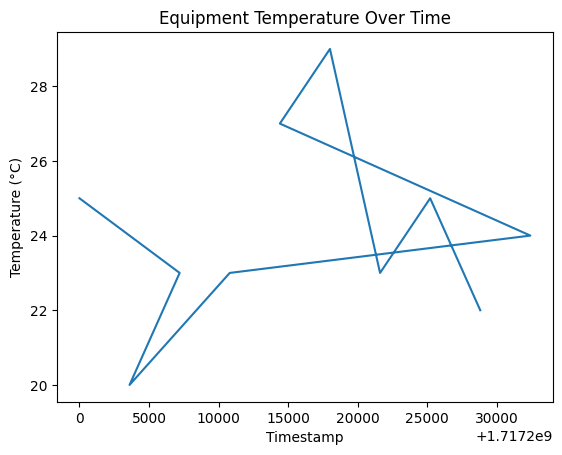

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load synthetic sensor data
sensor_data = pd.read_csv('synthetic_sensor_data.csv')

# Convert timestamp to Unix timestamp
sensor_data['timestamp'] = pd.to_datetime(sensor_data['timestamp'])
sensor_data['timestamp'] = sensor_data['timestamp'].astype(int) // 10**9

# Load clinical records
clinical_records = pd.read_csv('synthetic_clinical_notes.csv')

# Load imaging data (assuming it might not contain relevant features)
imaging_data = pd.read_csv('synthetic_image_data.csv')

# Add 'equipment_id' and 'patient_id' to the DataFrames (replace with your actual ID generation logic)
sensor_data['equipment_id'] = np.random.randint(1, 10, sensor_data.shape[0])
clinical_records['equipment_id'] = np.random.randint(1, 10, clinical_records.shape[0])
sensor_data['patient_id'] = np.random.randint(1, 20, sensor_data.shape[0])

# Preprocess the data
# Merge sensor data and clinical records
merged_data = pd.merge(sensor_data, clinical_records, on='equipment_id')

# Generate a target variable. Replace this with your actual logic for defining equipment failure.
merged_data['equipment_failure'] = np.random.randint(0, 2, merged_data.shape[0])

# Feature Engineering
# Convert text data in 'clinical_notes' to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(merged_data['clinical_notes'])

# Create a new DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Merge the TF-IDF features with the rest of the data
merged_data = pd.concat([merged_data, tfidf_df], axis=1)
merged_data = merged_data.drop('clinical_notes', axis=1) # Drop the original 'clinical_notes' column

# Train-Test Split
X = merged_data.drop(['equipment_failure'], axis=1)
y = merged_data['equipment_failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization (Needs Adjustment)
# Plot equipment health over time
# Note: The original code used 'health_score' which was not present in the data.
# You will need to replace this with an appropriate column from your data.
# For this example, we will use 'temperature(°C)' as a proxy.
plt.plot(merged_data['timestamp'], merged_data['temperature(°C)'])
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Equipment Temperature Over Time')
plt.show()